In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

# Review of Main Course Topics

##### A couple of highlights before we go in details:

- Python is an intuitive language: most commands are exactly what you would say (list--> list; print--> print(); interpolate --> interp; etc)
- Unlike other languages (e.g., C, FORTRAN) Python is interpreted (no compiler needed)
- Has no declarations 
- Does the memory management under the hood 
- Widely used in science and industry, so it has a lot of already developed routines for numerical and science problems
- It's free!
- Can easily interact with modules from other languages (C/Fortran) i.e. Cython
- Can do network programming, encryption, databases, ML --> super useful in industry and science!
- Python has a wealth of functions to do what you want (numpy, scipy ....)


Most of the things you want to do have probably already been done by someone. If you are stuck, don't try to reinvent the wheel: search python.org, numpy.org, scipy.org, matplolib.org, stackoverflow.com etc for a solution from someone else

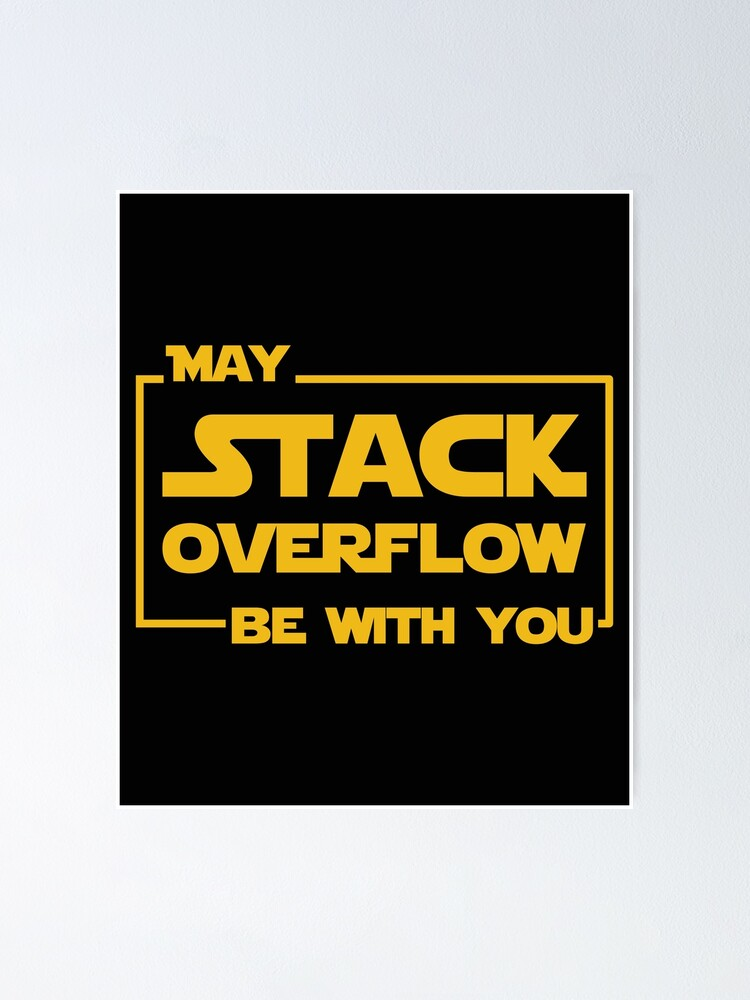

##### Import all the packages you need at the start of your code

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### sometimes you might not need the whole package, but one function out of it:

In [6]:
from scipy.stats import chisquare

##### ...or you might want to import functions from a **.py** file you stored them in:

In [1]:
from my_functions import F2C
import otherfunc as of

In [2]:
print(F2C(212))
print(of.circle_a_and_v(3))

100.0
113.09733552923255


Keeping a good work log is good practice. Also important for coding is to keep good comments in your code

Python has data types that are:
- **mutable**: lists, numpy arrays, dictionaries 
- and **immutable**: tuples, strings. 

What does it means that they are mutable?

In [4]:
#Create a list x:
x = [1,2,3]
print(type(x))
#Slice the element stored at i = 2:
x[2] = 0
print(x)

y = (1,2,3)
print(type(y))
try:
    y[2] = 0
except:
    print("Tuples are immutable!",y)


<class 'list'>
[1, 2, 0]
<class 'tuple'>
Tuples are immutable! (1, 2, 3)


TypeError: 'tuple' object does not support item assignment

#### Slicing lists/arrays:

Every time you want to access part of your array, list, tuple etc you are slicing your array,....

**Important to remember:** 
- Python starts counting (indexing) from 0.
- when slicing you START_AT : UP_TO_AND_NOT_INCLUDING: WITH_A_STEP_OF
- if you leave the START or UP_TO empty it is going from start, or to end of array/list/..

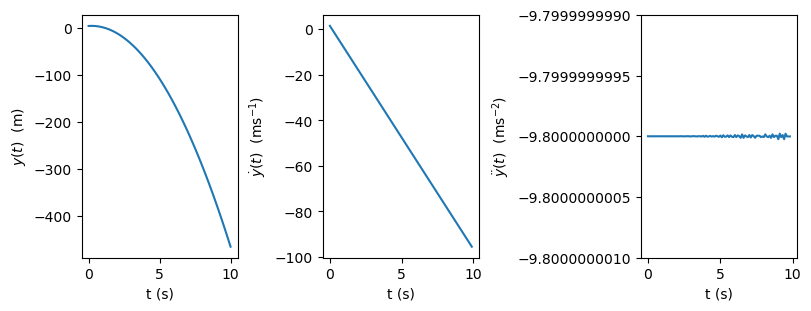

In [8]:
#Create some data for a projectile moving in the y direction:

dt = 0.1
t = np.arange(0,10.1,dt) # in seconds
y = 5 + 2*t - 0.5*9.8*t**2

#Use some clever slicing to get the velocity using the forward difference:
#Get dy = y[i] - y[i-1]:
dy = y[1:] - y[0:-1]
v = dy/dt
a = (v[1:] - v[0:-1])/dt

fig, ( ax1, ax2, ax3 ) = plt.subplots( 1, 3 , figsize = (8, 3 ),layout="constrained")
 
ax1.plot(t,y)
ax1.set_xlabel('t (s)')
ax1.set_ylabel('$y(t) \mathrm{~~(m)}$')
ax2.plot(t[0:-1],v)
ax2.set_xlabel('t (s)')
ax2.set_ylabel('$\dot{y}(t) \mathrm{~~(ms^{-1})}$')
ax3.plot(t[0:-2],a)
ax3.set_xlabel('t (s)')
ax3.set_ylabel('$\ddot{y}(t) \mathrm{~~(ms^{-2})}$')
ax3.set_ylim(-9.8 -1e-9,-9.8 + 1e-9)

ax3.ticklabel_format(useOffset=False, style='plain', axis='y')






### 1, 2,...,$n$ D cases:
**1D case:**

In [18]:
my_list = [ 1, 2, 3, 4, 10, 12, 14, 16 ]

In [20]:
# get elements 3, 4, 10 ; then get element 16:
print(my_list[2:4])
print(my_list[-1])
indices = [2,3,-1]
my_array = np.array(my_list)
print(my_array[indices])

[3 4]
16
[ 3  4 16]


In [21]:
# get elements starting from 2, with a step of 2:
my_list[1::2]

array([ 2,  4, 12, 16])

In [28]:
# get every other element starting with the last one backwards:
my_list[8::-1]

array([16, 14, 12, 10,  4,  3,  2,  1])

**2D case:**

In [29]:
twodim_array = np.reshape( np.linspace( 1, 10, 24 ), (4,6) )

In [30]:
print( twodim_array )

[[ 1.          1.39130435  1.7826087   2.17391304  2.56521739  2.95652174]
 [ 3.34782609  3.73913043  4.13043478  4.52173913  4.91304348  5.30434783]
 [ 5.69565217  6.08695652  6.47826087  6.86956522  7.26086957  7.65217391]
 [ 8.04347826  8.43478261  8.82608696  9.2173913   9.60869565 10.        ]]


**Let's slice 2D the array**

In [32]:
# get the data of the first row :
twodim_array[0,:]

array([1.        , 1.39130435, 1.7826087 , 2.17391304, 2.56521739,
       2.95652174])

In [33]:
# get the data of the second column:
twodim_array[:,1]

array([1.39130435, 3.73913043, 6.08695652, 8.43478261])

In [35]:
# get the data :
# 3.73913043  4.13043478  4.52173913
# 6.08695652  6.47826087  6.86956522
twodim_array[1:3,1:4]

array([[3.73913043, 4.13043478, 4.52173913],
       [6.08695652, 6.47826087, 6.86956522]])

#### For things that you want to do repeatedly you should create your own functions. You can store them in a .py file if you will use them more often. 

#### **Modules** are *packages* of functions.

In [38]:
def my_function( a, b, kwarg = None ):
    """Writting an informative docstring is super important. It will help you later on to 
    remember what your function is supposed to be doing. 
    Input: a, b parameters
    Output: parameter c 
    kwarg is a keyword argument"""
    
    q = np.log( a ) + b
    
    return q

The variable names you use in your main code can be different from the ones in the funct; just make sure that you keep the consistent in either block of code 

In [39]:
print(my_function(1,2))

a1 = np.linspace( 4, 8, 20 )
a2 = a1 ** 2

s = my_function( a1, a2 )

print( s )

2.0
[17.38629436 19.16611951 21.03208419 22.98442138 25.02333298 27.14899508
 29.36156223 31.66117076 34.04794156 36.52198233 39.08338944 41.73224944
 44.46864037 47.29263284 50.20429092 53.20367297 56.29083225 59.46581753
 62.72867357 66.07944154]


#### *If*, *For* and *While* statements are powerful for controlling the flow of data in your program. 

**for:** for things that you want to do in a repetitive pattern (e.g., go through every element of list and multiply it by 2)

In [46]:
a = [ 2, 4, 5,  8, 11, 12, 14, 16, 21, 24 ]
b = np.zeros(len(a))
for i in range( len( a ) ):
    #a[ i ] = a[ i ] * 2
    b[i] = np.sqrt(a[i])
print( a, b )




[2, 4, 5, 8, 11, 12, 14, 16, 21, 24] [1.41421356 2.         2.23606798 2.82842712 3.31662479 3.46410162
 3.74165739 4.         4.58257569 4.89897949]


In [41]:
# you can scan a list directly with:
for i, number in enumerate(a):
    print( i, number )


0 4
1 8
2 10
3 16
4 22
5 24
6 28
7 32
8 42
9 48


In [46]:
for i in range( len( a ) ):
    print( a[ i ] )

4
8
10
16
22
24
28
32
42
48


In [48]:
for i in range(len(a)):
    if a[i] % 2 == 0 :
        print( a[i], ' is even' )
    else: 
        print( a[i], ' is odd')
    

2  is even
4  is even
5  is odd
8  is even
11  is odd
12  is even
14  is even
16  is even
21  is odd
24  is even


In [56]:
b = [ 2, 4, 5,  8, 11, 12, -4, 14, 16, 21, 24 ]

i = 0

while b[ i ] > 0 :
    print( b[ i ] )
    i+=1


for i in range(len(b)):
    if b[i] > 0:
        print(b[i])
    else:
        break

2
4
5
8
11
12
2
4
5
8
11
12


### Remember that *numpy* may not need FOR loops! If you can use numpy go for it!

In [57]:
# get two numpy arrays and multiply them element by element:
n1 = np.arange( 0, 11, 2 )
n2 = np.arange( 10, 21, 2 )

#we don't need FOR, numpy is smart enough to do it for us!
n3 = np.sum(n2 * n1)
n4 = np.dot(n2,n1)

In [58]:
print( n3 )
print(n4)

520
520


**if:** for conditional things (e.g., only need to multiply elements of a list by 2  IF they are odd, and if they are even and NOT 4 multiply by 3)

In [71]:
list1 = [ 0, 1, 2, 3, 4, 5, 6, 7, 8]
arr1 = np.array(list1)

In [72]:

#it's a repetitive thing, so I start with a for:
for i in range( len( list1) ):
    #now comes the condition:
    if list1[ i ] % 2 == 1:
        list1[ i ] = list1[ i ] * 2
    #then I have another condition:
    elif (list1[ i ] % 2 == 0) & ( list1[ i ] != 4 ) :
        list1[ i ] = list1[ i ] * 3
    #if I have other elements they would go to the else; in this case it just stays as is :
    else:
        list1[ i ] = list1[ i ]


In [73]:
print( list1 )

[0, 2, 6, 6, 4, 10, 18, 14, 24]


In [74]:

odd = np.where(arr1 % 2 ==1)
even_not_four = np.where((arr1 % 2 == 0) & (arr1 != 4))

arr1[odd]*=2
arr1[even_not_four]*=3

for i in range(len(list1)):
    print(arr1[i] - list1[i])

0
0
0
0
0
0
0
0
0


#### Bugs are an inevitability, but you can use some tricks to make your life easier:
- When creating your code make sure you test it often and with different test cases. Smaller batches are much easier to debug than larger ones.
- Once you see there is a bug, debug: print() variables or use Python's debugger:
- Make sure to  `import pdb`
- Then use `pdb.set_trace()` to set a breakpoint in your code


Sometimes bugs will make your code seem to run as it should, but results don't make sense:

In [53]:
# e.g., we saw how a typo can be a bug:
import pdb
def volume(radius):
    """Calculates the volume of a sphere of radius R  
    Input: R (m)
    Output: V (m$^3$)"""

    
    volumee = (4./3.) * np.pi * (radius**3)   #----typo!
    pdb.set_trace()
    try:
        return(volumee)
    except:
        print("No volume to return")
    

print( volume( 10 ) )


> /var/folders/k4/29_257m513zg9w42bfwk5d400000gn/T/ipykernel_15486/2232567196.py(11)volume()
      9     volumee = (4./3.) * np.pi * (radius**3)   #----typo!
     10     pdb.set_trace()
---> 11     try:
     12         return(volumee)
     13     except:



ipdb>  c


4188.790204786391


In [9]:
# or how an accidental omission can make the code appear to work, while it doesnt:

num = int(input("Give me a number:"))

if num == 10 or 1:
    print('the number is 10 or 1')
else:
    print('the number is not 10 or 1')


Give me a number: 13


the number is not 10 or 1


Sometimes bugs will make your code crash:

In [16]:
def volume(radius):
    """Calculates the volume of a sphere of radius R  
    Input: R (m)
    Output: V (m$^3$)"""

    
    volume = (4./3.) * np.pi * (radius**3)   #----typo!
    
    print( 'the volume is, volume )
    
    return(volume)


Often bugs can be associated with the indentation of your code:

In [17]:
volume(10)

the volume is 4189


4188.790204786391

In [82]:
# make code that scans array F and prints the last value at each step 
# and the mean of the array up to that point:

F = np.linspace( 1, 12, 20)
print( F )

[ 1.          1.57894737  2.15789474  2.73684211  3.31578947  3.89473684
  4.47368421  5.05263158  5.63157895  6.21052632  6.78947368  7.36842105
  7.94736842  8.52631579  9.10526316  9.68421053 10.26315789 10.84210526
 11.42105263 12.        ]


In [87]:
for i in range( len( F ) ):
    print( F[ i ] , np.mean( F[ : i +1 ] ) )

1.0 1.0
1.5789473684210527 1.2894736842105263
2.1578947368421053 1.5789473684210524
2.736842105263158 1.8684210526315788
3.3157894736842106 2.1578947368421053
3.8947368421052633 2.4473684210526314
4.473684210526316 2.736842105263158
5.052631578947368 3.026315789473684
5.631578947368421 3.3157894736842106
6.210526315789474 3.605263157894737
6.7894736842105265 3.8947368421052633
7.368421052631579 4.18421052631579
7.947368421052632 4.473684210526316
8.526315789473685 4.7631578947368425
9.105263157894736 5.052631578947369
9.68421052631579 5.342105263157895
10.263157894736842 5.63157894736842
10.842105263157896 5.921052631578947
11.421052631578949 6.210526315789473
12.0 6.5


#### When you are interested in doing numerical or scientific computations you have **numpy** and **scipy** at your disposal. 

In [18]:
a = np.loadtxt('a_scatter_plot.dat')
print(a)

[[-0.9 -0.9 -0.9]
 [-0.9 -0.9 -0.8]
 [-0.9 -0.9 -0.7]
 ...
 [ 0.8  0.8  0.6]
 [ 0.8  0.8  0.7]
 [ 0.8  0.8  0.8]]


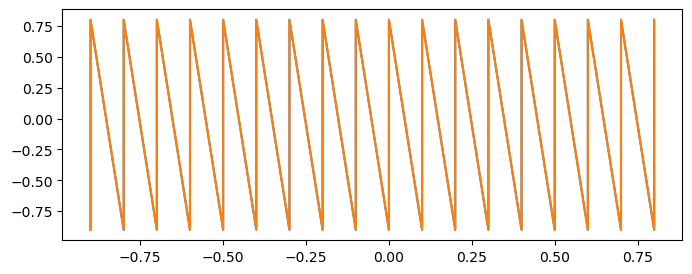

In [25]:
# slice the data array and assign each column to a named variable:
wav = a[ :, 0 ]
f1  = a[ :, 1 ]
f2  = a[ :, 2 ]

plt.figure(figsize = (8,3))
plt.plot(wav,f1)
plt.plot(wav,f2)

In [90]:
# you can now do all shorts of things to your data:
print( wav,  f1 )
print( 3 * f2[ 10 ] - 2 * f1[ 10 ] )

[-0.9 -0.9 -0.9 ...  0.8  0.8  0.8] [-0.9 -0.9 -0.9 ...  0.8  0.8  0.8]
2.1


In [20]:
b = np.array( [ [ 2, 3 ], [ 5, 4 ] ])

c = np.linspace(1, 16, 6).reshape((3, 2))

In [21]:
print( b )

print( c )

[[2 3]
 [5 4]]
[[ 1.  4.]
 [ 7. 10.]
 [13. 16.]]


#### you can fit models to data:

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
[13.997435   17.9240802   1.13693992  4.85890745 10.11617157  4.2964438
 10.99929903  5.83616949  2.86372552  0.93298871 11.83375574 12.79469427
 13.95050948  8.69681287  7.53380397  6.34959885]


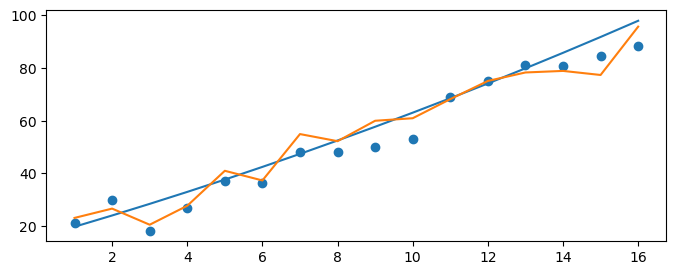

In [40]:
# you have observations:
plt.figure(figsize = (8,3))
x = np.linspace( 1, 16, 16 )
print(x)

noise = np.random.rand(len(x))*20.
print(noise)
y = 5 * x  + 2.1 + noise

plt.scatter(x,y)
plt.plot(x,myfunct(x,s1[0],s1[1],s1[2]))
plt.plot(x,np.polyval(s2,x))
#what is the best fit model a * x + b ?




In [29]:
from scipy.optimize import curve_fit

In [33]:
def myfunct( x, a, b, c ):
    """fits your function"""
    
    return a * x**2 + b * x + c

s1, v1 = curve_fit( myfunct, x, y, absolute_sigma = True, sigma = np.zeros( len( x ) ) + 2 )
print( s1,v1 )

[ 0.06677215  4.06969797 15.62774551] [[ 7.00280253e-04 -1.19047644e-02  3.57142934e-02]
 [-1.19047644e-02  2.14145701e-01 -7.07142991e-01]
 [ 3.57142934e-02 -7.07142991e-01  2.92142899e+00]]


In [39]:
s2 = np.polyfit(x,y,25)

/var/folders/k4/29_257m513zg9w42bfwk5d400000gn/T/ipykernel_29448/3134620281.py:1: RankWarning: Polyfit may be poorly conditioned
  s2 = np.polyfit(x,y,25)


In [97]:
# or if you want to do it manually:

a1 = np.arange( 1, 10, 0.05 )
a2 = np.arange( 1, 10, .05 )

chs = np.zeros( ( len( a1 ), len( a2 ) ) )

for i in range( len( a1 ) ):
    for j in range( len( a2 ) ):
        ym = a1[ i ] * x + a2[ j ]
        chs[ i, j ] = np.sum( ( ym - y ) ** 2. / ym**2 )


mn = np.where( chs == np.min( chs ) )

print( a1[ mn[ 0 ] ], a2[ mn[ 1 ] ] )


[5.05] [9.95]


#### Good plots are important to show your results and convey your mesage to your audience

### For most plots the basic plt will work just fine.

In [57]:
%matplotlib inline

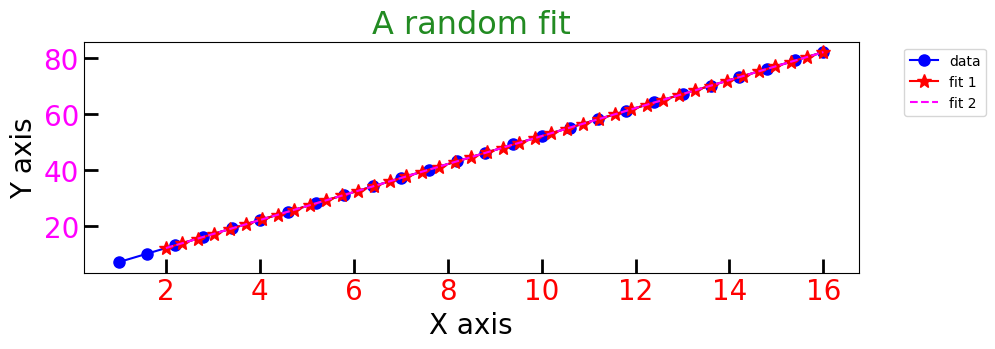

In [60]:
# you have observations 
x = np.linspace( 1, 16, 26 )
y = 5 * x  + 2.1

# you now have another observation at different x points
x2 = np.linspace( 2, 16, 42 )
y2 = 5 * x2  + 2.1

# and you want to test if they are coming from the same distribution

#first interpolate y from the x to the x2 grid so that we compare apples to apples:
yb = np.interp( x2, x, y)


#then plot to compare:

plt.figure( figsize = ( 10, 3 ) )
plt.plot( x, y , color = 'blue' , marker = 'o', markersize = 8 , label = 'data')
plt.plot( x2, y2, color = 'red' , marker = '*', markersize = 10, label = 'fit 1' )

plt.plot( x2, yb, color = 'magenta', linestyle = '--', label = 'fit 2')

plt.xlabel( 'X axis', fontsize = 20 )
plt.ylabel( 'Y axis', fontsize = 20 )
plt.legend(bbox_to_anchor=(1.05, 1))

plt.xticks( fontsize = 20 , color = 'red'     )
plt.yticks( fontsize = 20 , color = 'magenta' )
plt.title( 'A random fit', fontsize = 23, color = 'forestgreen' )

plt.tick_params( which = 'both', direction = 'in' , width = 2, length = 10 )
plt.savefig('myplot.png')
plt.show()

### If you want more complex plots (side by side, one on top of another, double x or y axis etc) you need to use the advanced plotting method with ax

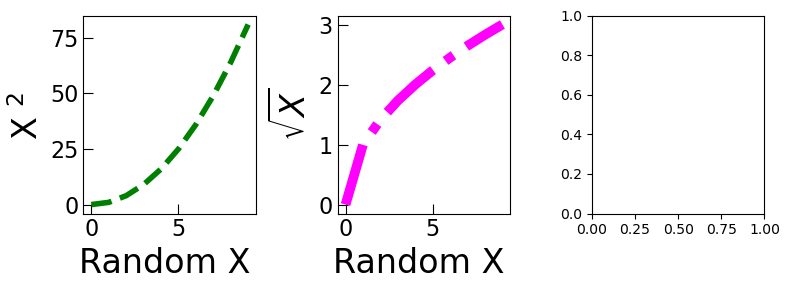

In [63]:
fig, ( ax1, ax2, ax3 ) = plt.subplots( 1, 3 , figsize = (8, 3 ) )

ax1.plot( np.arange( 10 ) , np.arange( 10 )**2, color = 'green', linestyle = '--' , linewidth = 4 )
ax1.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )
ax1.set_xlabel( 'Random X ' , fontsize = 24 )
ax1.set_ylabel( 'X $^2$ ' , fontsize = 24 )

ax2.plot( np.arange( 10 ) , np.arange( 10 )**0.5, color = 'magenta', linestyle = '-.' , linewidth = 7 )
ax2.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )
ax2.set_xlabel( 'Random X ' , fontsize = 24 )
ax2.set_ylabel( '$\\sqrt{X}$ ' , fontsize = 24 )
plt.tight_layout()
plt.show()

### or if, like here, you want them to share the x axis:

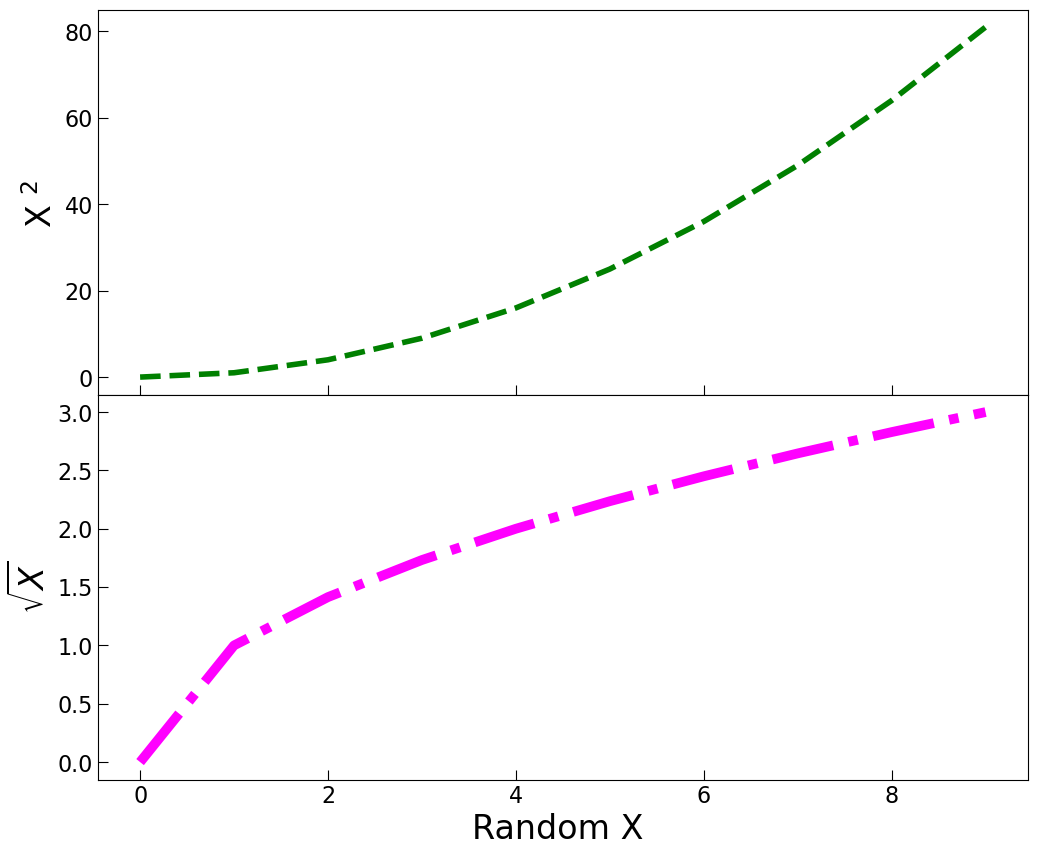

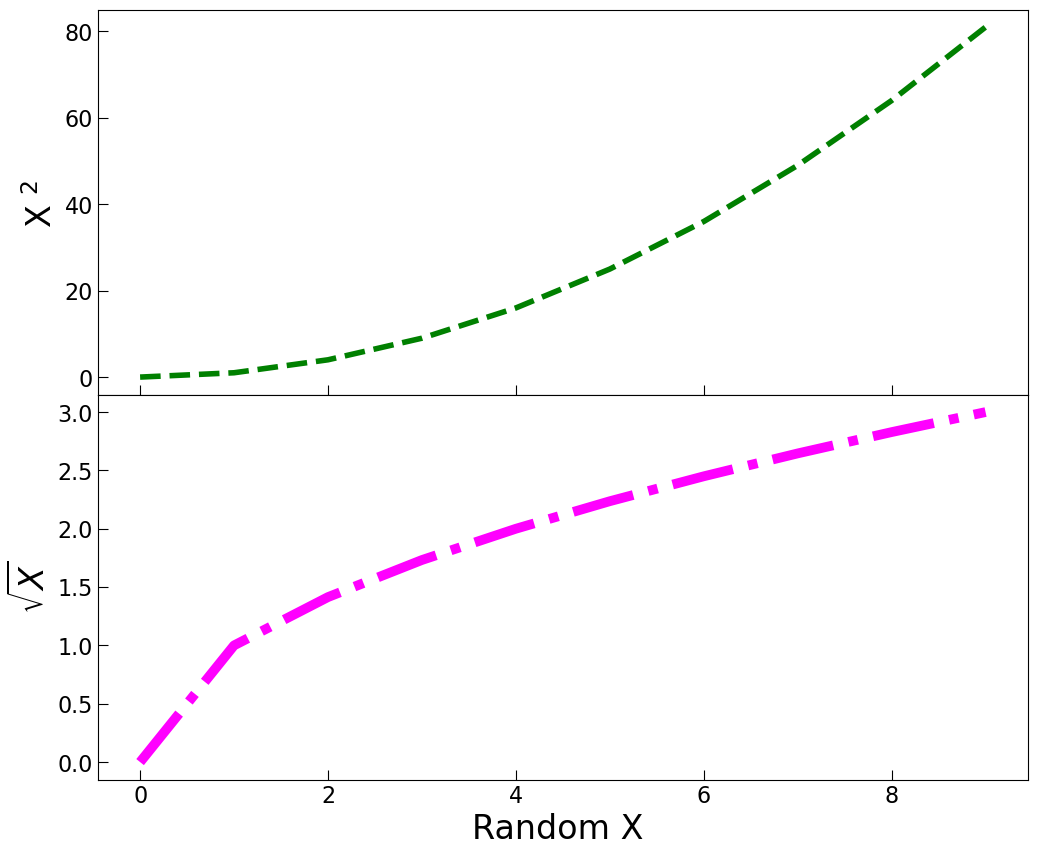

In [65]:
fig, axs = plt.subplots( 2, sharex = True, gridspec_kw={'hspace':0}, figsize =( 12, 10) )

axs[0].plot( np.arange( 10 ) , np.arange( 10 )**2, color = 'green', linestyle = '--' , linewidth = 4 )
axs[0].tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )
axs[0].set_xlabel( '  ' , fontsize = 24 )
axs[0].set_ylabel( 'X $^2$ ' , fontsize = 24 )

axs[1].plot( np.arange( 10 ) , np.arange( 10 )**0.5, color = 'magenta', linestyle = '-.' , linewidth = 7 )
axs[1].tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )
axs[1].set_xlabel( 'Random X ' , fontsize = 24 )
axs[1].set_ylabel( '$\\sqrt{X}$ ' , fontsize = 24 )
plt.show()

### when you want to get plotting things in 3D remember to import: 
from mpl_toolkits.mplot3d import Axes3D

In [66]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib 

Using matplotlib backend: macosx


### then you can do things like:

In [67]:
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(2*np.pi*theta)
y = r * np.cos(2*np.pi*theta)


fig = plt.figure( figsize = ( 10, 10 ) )
ax = plt.axes(projection='3d')
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

In [64]:
data = np.loadtxt( 'a_scatter_plot.dat')
x = data[:,0]
y = data[:,1]
z = data[:,2]

In [91]:
#hard to see what happens in 2d: plot it out using 3 different colors for each combi:


In [92]:
#now, plot it in 3D:


### You can also use interactive plotting outside of the notebook:
use `%matplotlib`
to get back use `%matplotlib inline`

In [32]:
%matplotlib

Using matplotlib backend: MacOSX


In [68]:
#from https://matplotlib.org/stable/gallery/mplot3d/voxels.html

# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between
# them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxelarray = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxelarray.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxelarray, facecolors=colors, edgecolor='k')

plt.show()

In [3]:
%matplotlib

Using matplotlib backend: macosx


In [69]:
'''
======================
Triangular 3D surfaces
======================

Plot a 3D surface with a triangular mesh.
From https://matplotlib.org/2.0.2/mpl_examples/mplot3d/trisurf3d_demo.py
'''


n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)


### Remember to turn back to non-interactive mode with:

In [70]:
%matplotlib inline

### Sometimes you will have data that you want to contour plot (2D + 1D in color). 

In [71]:
data = np.loadtxt('whatsinthefile.dat')
data = np.flip( data, 0)

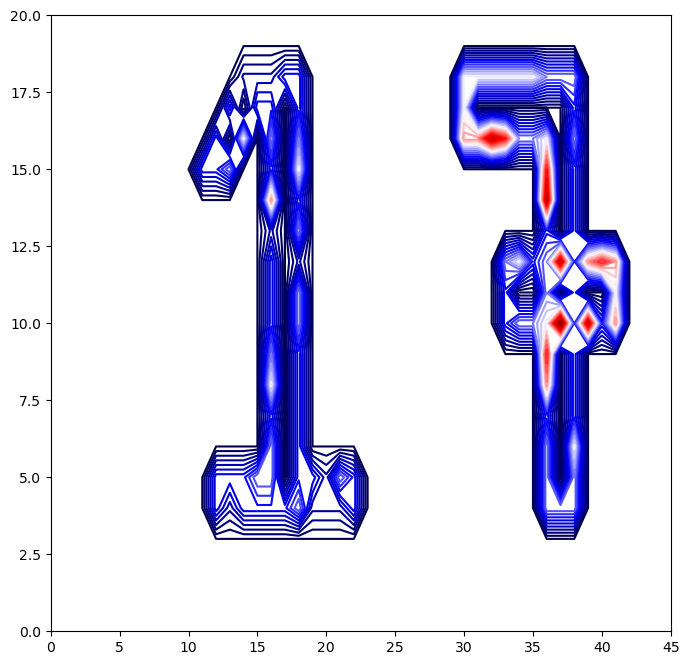

In [74]:
plt.figure( figsize = (8,8) )
plt.contour( data ,[0,1],cmap = 'seismic',levels = 30)
plt.show()

## I) Last, but not least, you will often need to fit data with models. Python offers premade functions to do this such as curvefit, leastsq, polyfit (for polynomials). You can also do a brute-force parametric scan.

In [98]:
import scipy as sp

In [107]:
x = np.array( [ 12., 12.54, 13.07, 13.61, 14.15, 14.68, 15.22 , 15.76, 16.29, 16.83, 17.37, 17.90,
 18.44, 18.98, 19.51, 20.05, 20.58, 21.12, 21.66, 22.21, 22.73, 23.27, 23.80, 24.34,
 24.88, 25.41, 25.95, 26.48, 27.02, 27.56, 28.11, 28.63, 29.17, 29.71, 30.24, 30.78,
 31.32, 31.85, 32.39, 32.93, 33.46, 34. ] )
y = np.array( [1137.61, 1174.34, 1209.87, 1244.19, 1277.31,
 1309.21, 1339.93, 1369.39, 1397.67, 1424.74, 1450.61, 1475.25, 1498.69, 
 1520.90, 1541.94, 1561.75, 1580.35, 1597.72, 1613.93, 1628.91, 
 1642.67,  1655.22, 1666.57, 1676.711, 1685.63, 1693.35,  1699.92, 
 1705.16, 1709.25, 1712.14, 1713.81, 1714.27, 1713.48, 1711.57, 1708.41, 
 1704.04, 1698.45, 1691.66, 1683.66, 1674.44, 1664.02, 1652.40       ])
y_err = np.array( [21.7319576 , 22.43361705, 23.11235269, 23.7679735 , 24.4006705 ,
       25.01006163, 25.59691102, 26.15969042, 26.69992808, 27.2170509 ,
       27.71124992, 28.18195203, 28.62973035, 29.05401176, 29.45594246,
       29.83437627, 30.18969524, 30.5215173 , 30.8311797 , 31.11734519,
       31.38020481, 31.6199496 , 31.83677058, 32.03049583, 32.20087701,
       32.34835348, 32.47386131, 32.57396192, 32.65209389, 32.70730205,
       32.73920435, 32.74799181, 32.7329003 , 32.69641325, 32.63604723,
       32.55256637, 32.44577965, 32.31606913, 32.16324376, 31.98711253,
       31.7880575 , 31.56607866])

y2 = y+(np.random.rand(len(y))-0.5)*100
print(len(y2))
x2 = np.linspace(12,34,500)
print(len(x2))
f = sp.interpolate.interp1d(x,y2,kind = 'cubic')
print(f(13.45672))

42
500
1213.502207981245


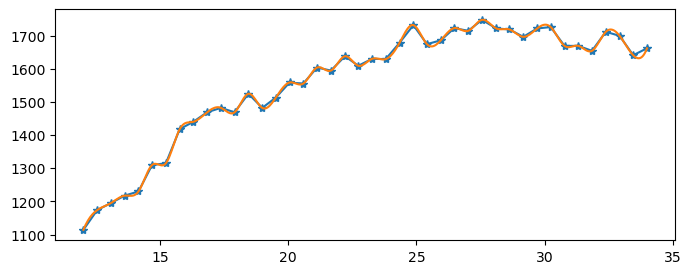

In [109]:

plt.figure(figsize = (8,3))
plt.plot(x,y2,marker = '*')
plt.plot(x2,f(x2))
plt.show()

In [15]:
#y += np.random.rand(len(y))*100.
plt.errorbar( x,y, yerr= y_err,marker = 'o', linestyle ='none',markersize = 5)
print(len(x))


42


### We know that the underlying model is of the form: $a * x**2 + b *x +c $   
### Let's do a brute-force fit limiting $a\in [ -20, 20)$  with a step of 0.1, $b\in[0.1, 140)$ with a step of 10. and $c\in[0, 1.5) $ with a step of 0.1:

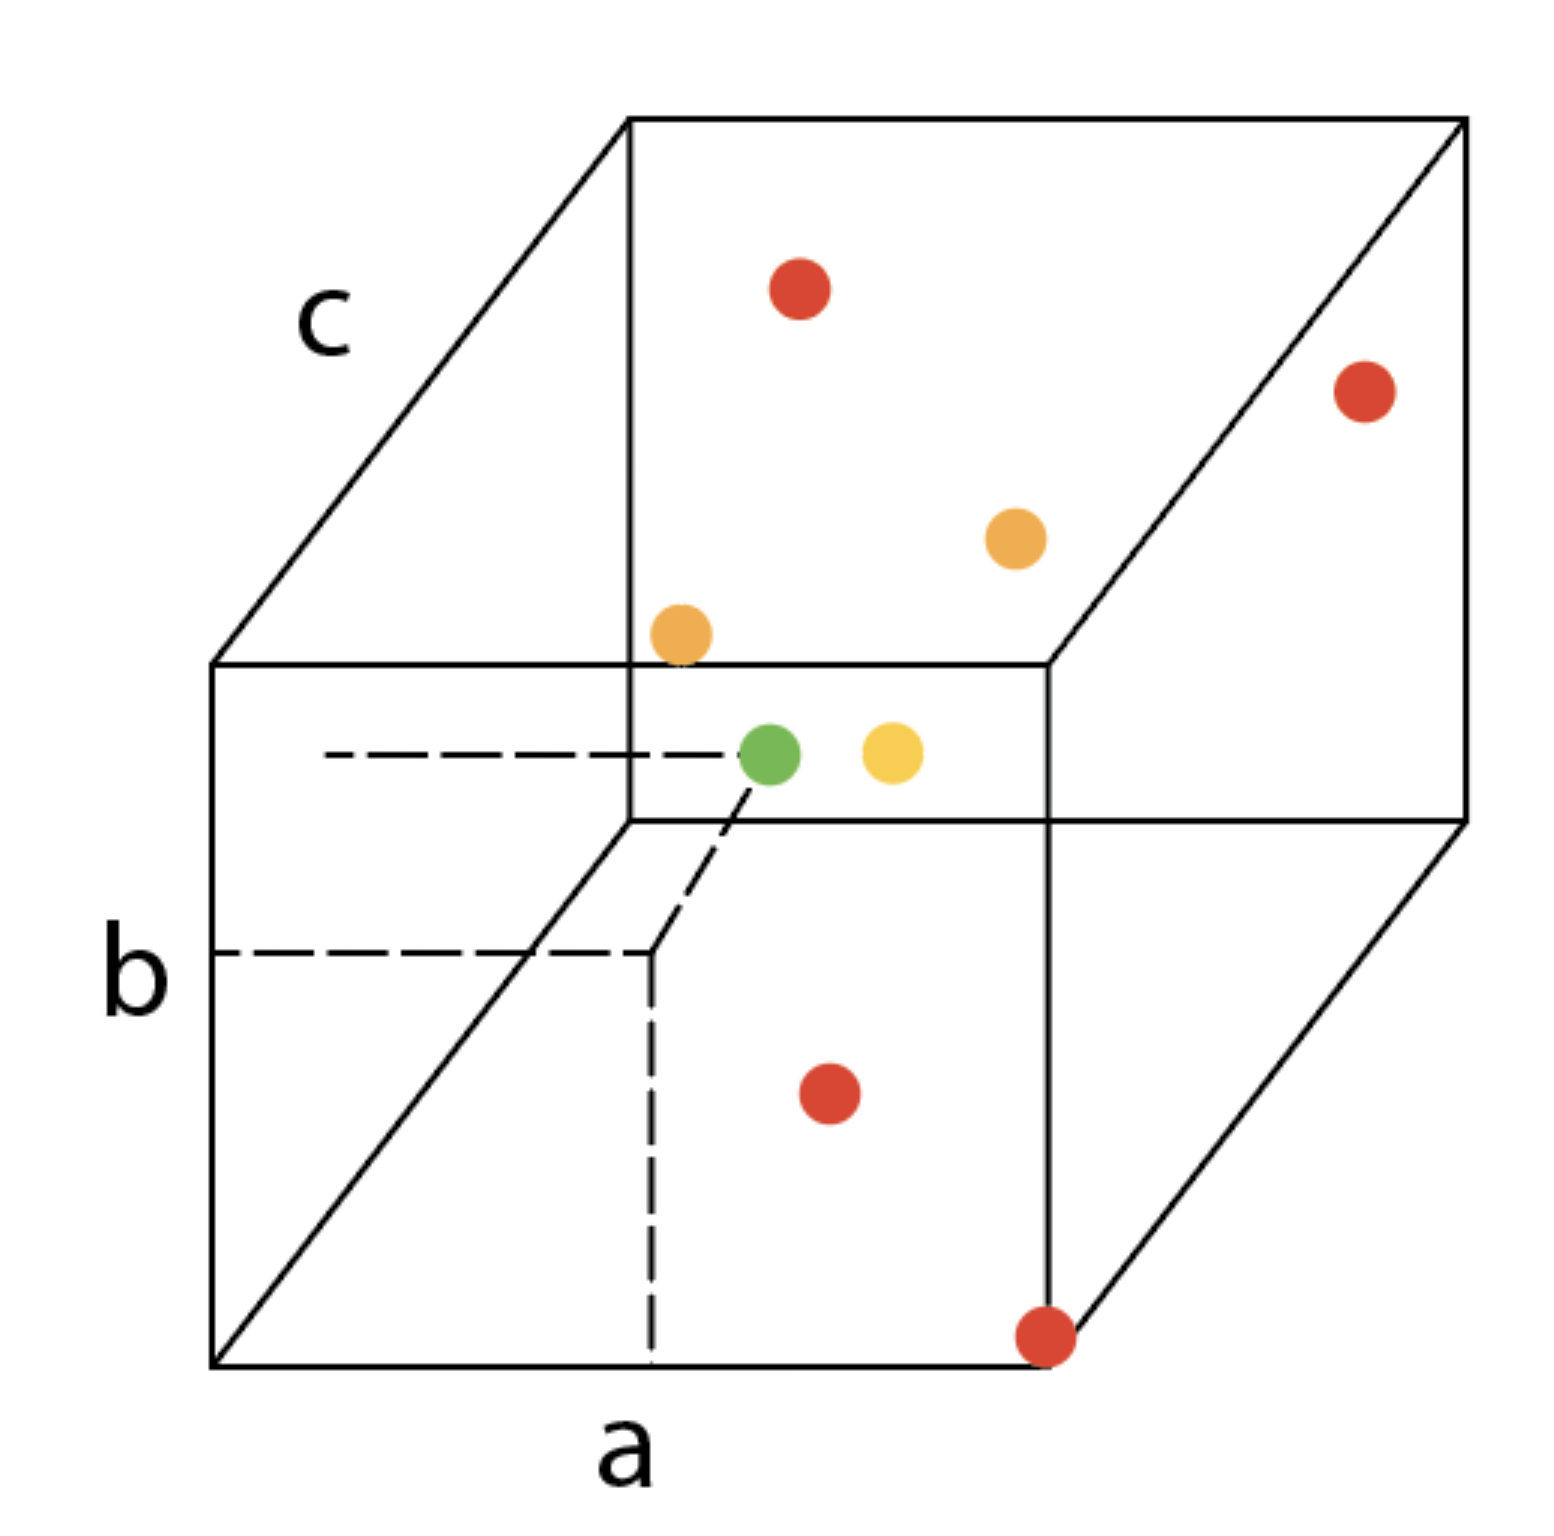

In [16]:
a = np.arange( -20, 20, 0.1)
b = np.arange( 0.1, 140 , 10. )
c = np.arange( 0., 1.5, 0.1 )

chsq = np.zeros((len(a),len(b),len(c)))
#fit here:
for i in range(len(a)):
    for j in range(len(b)):
        for k in range(len(c)):
            #my model:
            y_model = a[i]*x**2 + b[j]*x + c[k]
            #goodness of fit:             
            dof = 40 #deg of freedom: 42 - (3 - 1) = 40
            chsq[i,j,k] = np.sum((y - y_model)**2/y_err**2)/dof
            

In [17]:
print( np.min( chsq ))
min_loc = np.where( chsq == np.min( chsq ) )
print( min_loc )

0.006375620861884289
(array([179]), array([12]), array([0]))


In [18]:
print( 'The best model is: ', a[ min_loc[ 0 ] ] , '*x$^2$ +', b[ min_loc[1] ] , '*x + ', c[ min_loc[2]] , '.')

The best model is:  [-2.1] *x$^2$ + [120.1] *x +  [0.] .


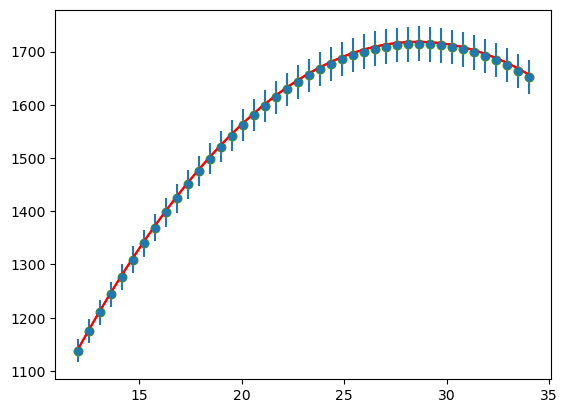

In [20]:
plt.plot( x,y, marker = 'o', linestyle ='none')
plt.plot( x, a[ min_loc[ 0 ] ]* x**2 + b[ min_loc[ 1 ] ] *x  + c[ min_loc[ 1 ] ] , color = 'red')
plt.show()

### or using curvefit:

In [83]:
def fit_my_curve( x, a, b, c ):
    
    print( 'a=', a, 'b=', b, 'c=', c)
    
    return a*x**2 + b *x + c

In [84]:
x1, x2 = curve_fit( fit_my_curve, x, y, sigma = np.ones( len( x )) * 10 )

a= 1.0 b= 1.0 c= 1.0
a= 1.0 b= 1.0 c= 1.0
a= 1.0 b= 1.0 c= 1.0
a= 1.0000000149011612 b= 1.0 c= 1.0
a= 1.0 b= 1.0000000149011612 c= 1.0
a= 1.0 b= 1.0 c= 1.0000000149011612
a= -2.1001289613217624 b= 120.00735769064086 c= -0.11027068791631911
a= -2.1001289300274024 b= 120.00735769064086 c= -0.11027068791631911
a= -2.1001289613217624 b= 120.00735947888984 c= -0.11027068791631911
a= -2.1001289613217624 b= 120.00735769064086 c= -0.11027068627315781
a= -2.1001264973654554 b= 120.00724262211018 c= -0.10911095248727212
a= -2.100126466071132 b= 120.00724262211018 c= -0.10911095248727212
a= -2.1001264973654554 b= 120.00724441035744 c= -0.10911095248727212
a= -2.1001264973654554 b= 120.00724262211018 c= -0.10911095086139223
a= -2.1001264972715155 b= 120.0072426178035 c= -0.10911101937193562


### There is also `np.polyfit` for fitting $n^{th}$ degree polynomials: 

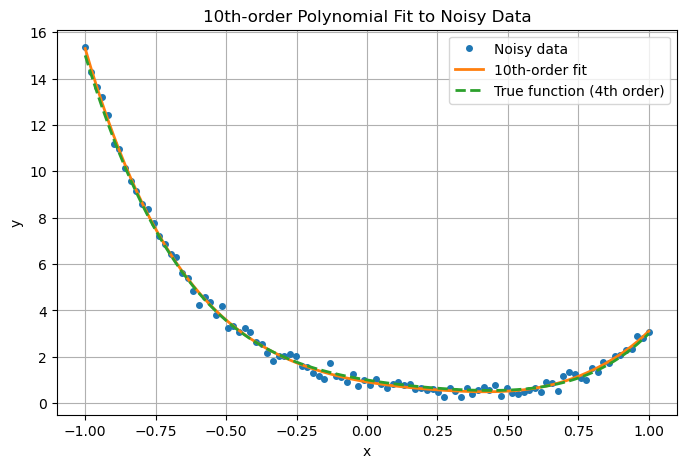

In [21]:
# Create some sample data
np.random.seed(0)
x = np.linspace(-1, 1, 100)
y_true = 1 - 2*x + 3*x**2 - 4*x**3 + 5*x**4  # Underlying polynomial (4th order)
noise = 0.2 * np.random.randn(len(x))
y_noisy = y_true + noise

# Fit a 10th-order polynomial to the noisy data
coeffs = np.polyfit(x, y_noisy, deg=10)

# Evaluate the fitted polynomial
p = np.poly1d(coeffs)
y_fit = p(x)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y_noisy, 'o', label='Noisy data', markersize=4)
plt.plot(x, y_fit, '-', label='10th-order fit', linewidth=2)
plt.plot(x, y_true, '--', label='True function (4th order)', linewidth=2)
plt.legend()
plt.title("10th-order Polynomial Fit to Noisy Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


https://www.kaggle.com/

UCF Data Analytics and Visualization Boot Camp (https://bootcamp.ce.ucf.edu/data/online/landing/?s=Google-Unbranded&dki=Become%20a%20Data%20Scientist&msg_cv_scta=4&msg_cv_stbn=1&msg_cv_fcta=1&pkw=how%20to%20data%20scientist&pcrid=458645039223&pmt=e&utm_source=google&utm_medium=cpc&utm_campaign=GGL%7CUCF%7CSEM%7CDATA%7C-%7CONL%7CTIER-1%7CALL%7CNBD-G%7CEXACT%7CCore%7CExploratory&utm_term=how%20to%20data%20scientist&s=google&k=how%20to%20data%20scientist&utm_adgroupid=110879426601&utm_locationphysicalms=9011804&utm_matchtype=e&utm_network=g&utm_device=c&utm_content=458645039223&utm_placement=&gclid=Cj0KCQjw1PSDBhDbARIsAPeTqrdDObxPmycETFrUDHdrwYchO0fBEpnyCZ9TnjJ5dImRYpzomF1nOwYaAuwuEALw_wcB&gclsrc=aw.ds)

# SymPy
Sympy is a Python library for **symbolic mathematics**, meaning it can **manipulate algebraic expressions exactly** instead of approximately (as NumPy does with floating point numbers).

In this notebook, you’ll learn:
- How to define symbolic variables and expressions
- How to simplify and expand expressions
- How to take derivatives and integrals
- How to solve equations symbolically
- How to render LaTeX output


In [1]:
# Import SymPy
import sympy as sp

# Enable pretty printing for output
sp.init_printing()

### Defining Symbols and Expressions

We use `symbols()` to define symbolic variables. Let's create variables `x`, `y`, and `z` and define a simple expression.


In [2]:
x, y, z = sp.symbols('x y z')

expr = x**2 + 2*x*y + y**2
expr


In [24]:
# Expand (x + y)**2
expanded = sp.expand((x + y)**2)
expanded


In [25]:
# Simplify the earlier expression
simplified = sp.simplify(expr)
simplified


### Derivatives

Use `diff()` to take derivatives symbolically.


In [29]:
# Derivative of x**2 * sin(x)
f = x**2 * sp.sin(x)
sp.diff(f, x)


In [27]:
# Partial derivative of x*y**2 with respect to y
sp.diff(x * y**2, y)


### Integration

Use `integrate()` to perform symbolic integration.


In [30]:
# Definite integral from 0 to 1
sp.integrate(x**2, (x, 0, 1))


###  Solving Equations

Use `Eq()` to create symbolic equations, and `solve()` to solve them.


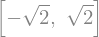

In [31]:
eq = sp.Eq(x**2 - 2, 0)
sp.solve(eq, x)


### Displaying Math Nicely with LaTeX

SymPy supports pretty-printing with LaTeX in Jupyter.


In [32]:
sp.Eq(sp.sin(x)**2 + sp.cos(x)**2, 1)


In [33]:
sp.latex(sp.Eq(sp.sin(x)**2 + sp.cos(x)**2, 1))


'\\sin^{2}{\\left(x \\right)} + \\cos^{2}{\\left(x \\right)} = 1'

## Practice makes perfect! 

- familiarize yourself with more than one language, but especially Python if you want to work on ML
- familiarize with statistical techniques (especially if interested in ML/data science)
- familiarize with data visualization techniques 


- get comfortable with presenting your work (see also the 3/1 lecture for Overleaf/Latex intro; 
   https://www.overleaf.com/read/kbgmssxspcvw will be active forever)
- think of ways/projects that show you are 
    - good with collaborations
    - good with learning new things


- work on some projects ( research/ internships and join competitions) 
- create a portofolio of projects  





# Neural Networks: For Beginners, By Beginners
adpated from Emil Krumov


## Introduction

So, neural nets. It’s the first thing that pops up in the minds of most of the common coders when they hear the buzzwords artificial intelligence and/or machine learning. Although not being the most fundamental material in the book, it is actually a not so bad starting point if explained in a beginner-friendly language.

Throughout this article I will take you on a journey starting from the very beginning of the neural networks ideology, take you through the core modern principles that make it learn, and finally show you a step-by-step implementation of a neural network model from scratch featuring Fully Connected, Activation, Flatten, Convolution and Pooling layers. This implementation is heavily based on and inspired by this amazing article by
Omar Aflak
which is a must-read for everyone who wants to learn more on the mathematical background of neural networks.

## Understanding Neural Networks

The history of neural networks traces back to 1943 when neurophysiologist Warren McCulloch and mathematician Walter Pitts portrayed a model of a human brain neuron with a simple electronic circuit which took a set of inputs, multiplied them by weighted values and put them through a threshold gate which gave as output a value of 0 or 1, based on the threshold value. This model was called the McCulloch-Pitts perceptron.

<img src="perceptron.gif" width=350 height=350 />
Image source: wikimedia commons


This idea was taken further by a psychologist called Rosenblatt who created the mathematical model of the perceptron and called it Mark I Perceptron. It was based on the McCulloch-Pitts model and was one of the first attempts to make a machine learn. The perceptron model also took a set of binary inputs which were then multiplied by weighted values(representing the synapse strength). Then a bias typically having a value of 1 was added(an offset that ensures that more functions are computable with the same input) and once again the output was set to 0 or 1 based on a threshold value. The input mentioned above is either the input data or other perceptrons’ outputs.

While the McCulloch-Pitts model was a groundbreaking research at that time, it lacked a good mechanism of learning which made it unsuitable for the area of AI.

Rosenblatt took inspiration from Donald Hebb’s thesis that learning occurred in the human brain through formation and change of synapses between neurons and then came up with the idea to replicate it in its own way. He thought of a perceptron which takes a training set of input-output examples and forms(learns) a function by changing the weights of the perceptron.

### The implementation took four steps:

1.  Initialize a perceptron with random weights
2.  For each example in the training set, compute the output
3.  If the output should have been 1 but was 0 instead, increase the weights with input 1 and vice-versa — if the output is 1 but should’ve been 0, decrease the weights with input of 1.
4.  Repeat steps 2–4 for each example until the perceptron outputs correct values

This set of instructions are what modern perceptrons are based on. Due to significant increase of computing power however, we can now work with many more perceptrons grouped together forming a neural network.

<img src="schem_of_perceptron_classifier.webp" width=350 height=350 />
Image source: mixtend

However, they are not just randomly put in the network but are actually part of another building block — a layer.

## Layers

A layer is made of perceptrons which are linked to the perceptrons of the previous and the next layers if such do happen to exist. Every layer defines it’s own functionality and therefore serves its own purpose. Neural networks consist of an input layer(takes the initial data), an output layer(returns the overall result of the network), and hidden layers(one or many layers with different sizes(number of perceptrons) and functionality).

<img src="layers.webp" width=350 height=350 />
Source: cs231n.github.io

In order for the network to be able to learn and produce results each layer has to implement two functions — forward propagation and backward propagation(shortly backpropagation).

In [9]:
# Base Class

class Layer:
  
  def __init__(self):
    self.input = None
    self.output = None
    
  def forward_propagation(self, input):
    raise NotImplementedError
    
  def backward_propagation(self, output_error, learning_rate):
    raise NotImplementedError



Imagine a train travelling between point A(input) and point B(output) which changes direction each time it reaches one of the points. The A to B course takes one or more samples from the input layer and carries it through the forward propagation functions of all hidden layers consecutively, until point B is reached(and a result is produced). Backpropagation is basically the same thing only in the opposite direction — the course takes the data through the backpropagation methods of all layers in a reverse order until it reaches point A. What differs the two courses though is what happens inside of these methods.

Forward propagation is only responsible for running the input through a function and return the result. No learning, only calculations. Backpropagation is a bit trickier because it is responsible for doing two things:

* Update the parameters of the layer in order to improve the accuracy of the forward propagation method.
* Implement the derivative of the forward propagation function and return the result.

So how and why does that happen exactly. The mystery unravels at point B — before the train changes direction and goes through the backpropagation of all the layers. In order to tune our model we need to answer two questions:

* How good the model’s result is compared with the actual output?
* How do we minimize this difference?

The process of answering the first question is known as calculating the error. To do that we use cost functions(synonyms with loss functions).

## $ MSE = \frac{1}{n} \sum_{i=0}^{N} (y_{Ei} - y_{Pi})^2$
Mean Squared Error(MSE) between expected (E) and predicted (P) values also called the sum of squared residuals. 
(This is the reduced $\chi^2$ statistic with the individual errors, $\sigma_i$ set to one)

It is a pretty straightforward function — we sum the squares of the difference between the actual output and the model’s output and we calculate the mean. But to help our model implementing MSE only isn’t going to be of any significant help. We must implement its derivative as well.

In [10]:
def mse(y, y_pred):    
  return np.mean((y - y_pred)**2)

def mse_prime(y, y_pred):
  return 2 * (y_pred - y) / y.size

$\vec{F} = -\vec{\nabla{\phi}}$

$\vec{F} = -\frac{\partial \phi}{\partial x}\hat{i}+\frac{\partial \phi}{\partial y}\hat{j}+\frac{\partial \phi}{\partial z}\hat{k}$

But why do we need this? Because of the infamous…
## Gradient Descent

The last thing we need to do here is to show our model how to minimize the error. To do that we need an optimization algorithm(optimizer). Once again, there are many kinds of optimizers all serving the same purpose but for the sake of keeping things simple but still meaningful we are going to use the most widely used and the one which many other optimization algorithms are based on. Behold the mighty Gradient Descent:

<img src="Cost_v_weight.webp" width=650 height=350 />
Graphical representation of Gradient Descent | Source: Medium

Doesn’t look as scary as it sounds, does it? Good news everybody, it is a relatively simple concept. By definition, the gradient is a fancy word for derivative, or the rate of change of a function.

<img src="3Dgradient_descent.webp" width=650 height=350 />
3D representation of Gradient | Source: OReilly

So let’s imagine our model is a ball. The surface represents the gradient(derivative) of the error. We want the ball to roll down the surface(descent) as low as possible in order to decrease the altitude(the error). Taking it to Math level — we need to reach a global(or at least a good enough local) minimum.

In order to make the ball move though, we need to update our parameters at a certain rate — called learning rate. This is a predefined parameter that we pass to our model before we run it. Those kind of parameters are called <em>hyperparameters</em> and have a huge role in our model’s performance. Here is what I mean:

<img src="learning_rate.webp" width=650 height=350 />
Significance of Learning Rate | Source: analyticsvidhya.com

If we choose a learning rate that is too big the parameters will change drastically and we might skip the minimum. If our learning rate is too small on the other hand, it will take too much time and hence computing power to reach a satisfying result. That’s why tuning this parameter by testing the model with different values of the learning rate is rather important. It is highly recommended to start with a learning rate of 0.1 or 0.01 and start tuning from there on.

## Back to back(propagation)

Now we need to update the model’s parameters layer by layer by passing the appropriate data to the backpropagation methods. The backpropagation takes two parameters — output error and the learning rate. Output error is calculated either as the result of the derivative of the cost function or as the result of the backpropagation of the previous layer(if looked from point B to point A) — as written above, the backward propagation should give as a result the derivative of the forward propagation function. By doing this each layer shows its predecessor its error.

So in other words if for some reason we had a Sine Layer it would look something like this:

In [11]:
class SineLayer(Layer):
  
  def forward_propagation(self, input_data):
    return np.sin(input_data)
    
  def backward_propagation(self, output_error, learning_rate):
  
    # some update logic based on the output_error and learning_rate
    
    return np.cos(output_error)

Now that we’ve got the two parameters needed, the backpropagation should update the layers weights(if such are present). Since every type of layer is different, it defines its own logic for parameter tuning — something which we will cover in a bit.

## Wrapping up Gradient Descent

When each layer’s backpropagation is complete and our train arrives at point A, it takes the next sample(or set of samples) and starts its course through the hidden layers’ forward propagation functions once again — only this time, they should perform a bit better. This process continues on and on until training is completed and/or an error minimum has been reached.

Now that we’ve explained all the theory behind gradient descent, here is how it should look in code:

In [12]:
#This is just an example it will break without inputs!

for j in range(samples_length):
  output = x_train[j]
  
  for layer in layers:
    output = layer.forward_propagation(output)

  error = loss_prime(y_train[j], output)
  
  for layer in reversed(layers):
      error = layer.backward_propagation(error, learning_rate)

NameError: name 'samples_length' is not defined

I hope this snippet gives much more clearance on the algorithm itself. The only thing that we haven’t fully covered yet is what types of layers we can use in a network and how to implement them.

## Basic Layers

As though there are many kinds of layers to choose from for a starter, the infamous Fully-Connected Layer is undoubtedly the best choice.
### Fully-Connected

The Fully-Connected Layer is the most widely used class type. Its principles of work are based on the Rosenblatt model and are as follow:

1. Every single perceptron from the previous layer is linked to every single perceptron of this layer.
2. Each link has a weighted value(weight).
3. A bias (offset) is added to the results.
4. The layer’s weights are held in a 2D array with size m x n (where m is the number of perceptrons in the previous layer and n is the number of perceptrons in this layer). They are initialized as random values.
5. The layer’s bias is held in a 1D array with size n. It is initialized as random values.

<img src="fully_connected_layer.webp" width=350 height=350 />
Visual representation of Fully-Connected (FC) Layer | Source: cs231n.github.io

Now let’s head to our implementation:

In [13]:
class FCLayer(Layer):
  
  def __init__(self, output_size):    
    self.output_size = output_size
    self.bias = np.random.rand(1, self.output_size) - 0.5
    
    self.weights = None
    
  def forward_propagation(self, input_data):
    if self.weights is None:
      self.initialize(input_data)
    
    self.input = input_data.reshape((1, -1)) # ensure data is a 1D array
    self.output = np.dot(self.input, self.weights) + self.bias # Multiply the links by their weights
    
    return self.output
  
  def backward_propagation(self, output_error, learning_rate):
    input_error = np.dot(output_error, self.weights.T) # calculate derivative of the forward propagation
    weights_error = np.dot(self.input.T, output_error) # calculate the weights error
    
    self.weights -= learning_rate * weights_error # update the weights
    self.bias -= learning_rate * output_error # update the error
    
    return input_error
  
  def initialize(self, input_data):        
    self.weights = np.random.rand(input_data.size, self.output_size) - 0.5

As you can see the implementation of our to methods here is not something too complicated as long as you know basic linear algebra. And although relatively simple, this is a completely useful and optimized layer implementation which we will easily put to use later.

The only problem with Fully-Connected Layers though is that they are <strong>linear</strong>. In fact, most layers have completely linear logic. A linear function is a polynomial of one degree. Using only such functions hinders the model’s ability to learn complex functional mappings, hence, learning is limited. That’s why(by convention) it is good to add non-linear functionality after every linear layer using activation layers.

## Activation Layer

Activation layers are just like any other type of layer except they don’t have weights but use a non-linear function over the input instead.

In [14]:
class ActivationLayer(Layer):
  
  def __init__(self, activation, activation_prime):
    self.activation = activation
    self.activation_prime = activation_prime
    
  def forward_propagation(self, input_data):
    self.input = input_data
    self.output = self.activation(self.input)
    
    return self.output
  
  def backward_propagation(self, output_error, learning_rate):
    return self.activation_prime(self.input, self.output) * output_error

A good example of such activation function is tanh which stands for hyperbolic tangent.
<img src = "tanh.webp" width = 350 height = 350 />
tanh compared to sinh and cosh | Source: Wikipedia

Since we are going to need it when we begin building our model, we need to implement it:

In [15]:
def tanh(X): # used for forward propagation
  return np.tanh(X)

def tanh_prime(X, output): # used for backpropagation
  return 1 - np.tanh(X) ** 2 # derivative of tanh

Now that we have our two most important layers implemented, let’s proceed to implementing the whole Neural Network class.

## Neural Network Implementation

There are several methods that need to be implemented

* a <strong>constructor</strong> — here we need to pass the <em>hyperparameters</em> (learning rate and number of epochs — the number of times our network will run over the input dataset); initialization of necessary fields
* <strong> add layer method</strong> — pass an instance of a layer; used for model construction; can (should) be used several times in order to add several layers;
* <strong> use <em>cost function</em> method</strong> — specify the cost function to be used when training the model
* <strong>fit method</strong> — a standard name for the method that performs the training process; here is where we will place the gradient descent snippet from earlier
* <strong> predict method</strong> — a standard name for the method that is used to calculate results only; it is useful once the training process is complete

And here goes the code:

In [48]:
class NeuralNetwork:
  def __init__(self):
    self.layers = []
    self.loss = None
    self.loss_prime = None

  def add(self, layer):
    self.layers.append(layer)
    return self

  def use(self, loss, loss_prime):
    self.loss = loss
    self.loss_prime = loss_prime

    return self

  def fit(self, x_train, y_train, epochs, learning_rate):
    samples = len(x_train)

    for i in range(epochs): # each epoch represents one iteration over all samples
      err = 0

      for j in range(samples): # our gradient descent logic from earlier in the article
        output = x_train[j]
        for layer in self.layers:
          output = layer.forward_propagation(output)

        err += self.loss(y_train[j], output)

        error = self.loss_prime(y_train[j], output)
        for layer in reversed(self.layers):
            error = layer.backward_propagation(error, learning_rate)

      err /= samples
      print('epoch %d/%d   error=%f' % (i+1, epochs, err))

    return self

  def predict(self, input_data):
      samples = len(input_data)
      result = []

      for i in range(samples): # basically running the forward propagation of all layers to get the result
          output = input_data[i]
          for layer in self.layers:
              output = layer.forward_propagation(output)
          result.append(output)

      return result

You may have noticed the return self statement being present at the end of every method. The reason I put this is that it allows us to do method chaining. If you are not sure what I am talking about, you are going to see a good example in a bit.

Now let’s put it to work. We are going to use the <strong>MNIST</strong> database for classifying handwritten digits. You can download it from http://yann.lecun.com/exdb/mnist/, or you can easily import it from <strong>Keras</strong>.

In [49]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Since the pixel values are represented in the range [0; 255], we are going to scale that down to a range of [0.0, 1.0] or binary.

Another thing we did is we made the y(the results) be a little bit more convenient(note keras.utils.to_categorical). What it does is it represents the numeric result in a one-shot vector:

5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

This is helpful because our network’s output layer is going to consist of 10 nodes, each holding an output value. Since the ideal case output would be a correct one-hot vector it is now easier for the cost function to do its job.

Now let’s construct our first network by putting some FC and activation layers:


In [50]:
import keras

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, 10)

In [51]:
fc_net = NeuralNetwork()

(fc_net
  .add(FCLayer(100))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(FCLayer(50))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(FCLayer(10))
  .add(ActivationLayer(tanh, tanh_prime))
  .use(mse, mse_prime)
  .fit(x_train[0:1000], y_train[0:1000], epochs=30, learning_rate=0.1)
)

preds = fc_net.predict(x_test[:1000])


epoch 1/30   error=0.243887
epoch 2/30   error=0.099832
epoch 3/30   error=0.074289
epoch 4/30   error=0.060483
epoch 5/30   error=0.050482
epoch 6/30   error=0.043401
epoch 7/30   error=0.037899
epoch 8/30   error=0.033392
epoch 9/30   error=0.029650
epoch 10/30   error=0.026630
epoch 11/30   error=0.024004
epoch 12/30   error=0.021862
epoch 13/30   error=0.020106
epoch 14/30   error=0.018653
epoch 15/30   error=0.017453
epoch 16/30   error=0.016362
epoch 17/30   error=0.015486
epoch 18/30   error=0.014703
epoch 19/30   error=0.014109
epoch 20/30   error=0.013422
epoch 21/30   error=0.012968
epoch 22/30   error=0.012347
epoch 23/30   error=0.011887
epoch 24/30   error=0.011292
epoch 25/30   error=0.010887
epoch 26/30   error=0.010395
epoch 27/30   error=0.009997
epoch 28/30   error=0.009540
epoch 29/30   error=0.009180
epoch 30/30   error=0.008831


The reason why we use only the first 1000 samples is that it is going to run too long if we use all the samples. Using more samples in this case will give you better results, so you can try a bigger range if you have the time.

Before we run this though, we need to add one more final touch — another pre-output activation function — Softmax. What it does is it normalizes an array with n elements in a probability distribution array consisting of n probabilities proportional to the exponentials of the input numbers, or simply put — calculates the probability that the sample matches a certain class.

### softmax function: $\mathrm{s}(z_i) = \frac{e^{z_i}}{\sum e^{z_j}}$

And the implementation:

In [52]:
def softmax(X):
  exps = np.exp(X - X.max())
  return exps / np.sum(exps)

def softmax_prime(X, output):
  result = np.zeros(X.shape)

  for i in range(len(output)):
    for j in range(len(X)):
      if i == j:
        result = output[i] * (1 - X[i])
      else: 
        result = -output[i] * X[j]
    
  return result

where we used:

## $\frac {\partial s_i}{\partial z_j} = s_i \frac {\partial}{\partial z_j} \mathrm{log} s_i = s_i \cdot (\delta_{ij} - s_j) $ 

for the derivative. The derivation is here: https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1

Let’s try it once again, only this time we are going to have the <strong>Softmax</strong> activation as our final layer.

In [53]:
fc_net = NeuralNetwork()

(fc_net
  .add(FCLayer(100))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(FCLayer(50))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(FCLayer(10))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(ActivationLayer(softmax, softmax_prime))
  .use(mse, mse_prime)
  .fit(x_train[0:2000], y_train[0:2000], epochs=30, learning_rate=.1)
)

preds = fc_net.predict(x_test[:100])


epoch 1/30   error=0.088400
epoch 2/30   error=0.080684
epoch 3/30   error=0.072763
epoch 4/30   error=0.065742
epoch 5/30   error=0.060788
epoch 6/30   error=0.057209
epoch 7/30   error=0.054539
epoch 8/30   error=0.052427
epoch 9/30   error=0.050710
epoch 10/30   error=0.049292
epoch 11/30   error=0.048100
epoch 12/30   error=0.047103
epoch 13/30   error=0.046262
epoch 14/30   error=0.045518
epoch 15/30   error=0.044834
epoch 16/30   error=0.044200
epoch 17/30   error=0.043617
epoch 18/30   error=0.043106
epoch 19/30   error=0.042649
epoch 20/30   error=0.042237
epoch 21/30   error=0.041861
epoch 22/30   error=0.041525
epoch 23/30   error=0.041223
epoch 24/30   error=0.040948
epoch 25/30   error=0.040697
epoch 26/30   error=0.040458
epoch 27/30   error=0.040221
epoch 28/30   error=0.040007
epoch 29/30   error=0.039818
epoch 30/30   error=0.039642


Now that we’ve trained our data, let’s evaluate our final model.

## Evaluation

Keep in mind that we have implemented a small model for educational purposes. It is not going to produce a quite high result. I would highly recommend playing around with it in order to get a better accuracy.

In order to evaluate our results, we are going to use a simple utility from <strong>sklearn</strong> which shows as the accuracy of our model.

[[0.05516644 0.05516538 0.06027584 0.05516688 0.14216217 0.05516643
  0.05516822 0.05946779 0.05526752 0.40699333]]
9


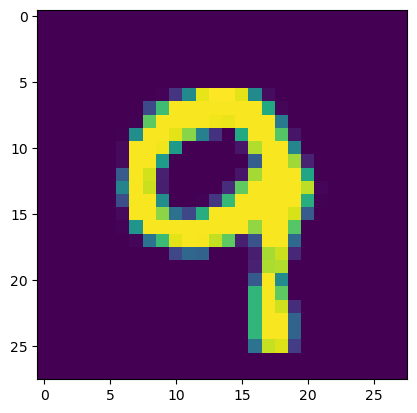

In [56]:
ii = 99
plt.imshow(x_test[ii,:,:,0])
print(preds[ii])
print(np.argmax(preds[ii]))

In [22]:
from sklearn.metrics import accuracy_score

normal_results = [np.argmax(sample) for sample in preds]

print('Accuracy | Normal net: {}'.format(accuracy_score(y_test[:100], normal_results)))

Accuracy | Normal net: 0.76


Now that you know the basic of neural network construction we can proceed to the more advanced stuff…


## Convolutional Neural Networks(CNN)

The main problem with using FC layers for image recognition tasks is that it uses each pixel as a separate feature, which doesn’t seem quite right, given the fact that neural networks are aiming at replicating the human brain. And what helps our brain identify visual input is not just random points, but patterns of points instead. Here’s where processes called convolution and correlation come in handy.
### Convolution and Correlation

Convolution and correlation in image processing are almost identical processes having one small difference in their implementation. Both of them take an image I, produce a matrix O based on another matrix (called filter or feature map) F. Here is what I mean

Let’s start with correlation:
<img src = "correlate_matrix.webp" width = 650 height = 350 />
Visual representation of Correlation | Source: My Late Night PowerPoint Creations
<img src = "correlate_matrix2.webp" width = 650 height = 350 />

Let’s explain what is happening. The filter is acting like a sliding window which goes through the array, step by step, sliding right until it reaches the end of the row. Then it slides down and starts at the beginning of the row. At each position we sum the dot product of the filter F and the respective window of the input image I. Each position represents a cell in the output O.

### Now what about convolution?

The only difference between correlation and convolution is that convolution works with the same filter F, only rotated 180 degrees.

<img src = "convolution.webp" width = 650 height = 350 />

### But how does that helps us?

By using this sort of filters, going through our image we extract not only one pixel, but a whole sector of pixels, enabling our model to map more complex image features like lines and shapes.

For example, if you give a convolution layer a cat image it will be able to recognize small features like nose and ears. Then by adding more convolution layers after that it may recognize features of a larger scale like a head or a tail.

The way this works is having several filters per convolution layer, all initialized with random numbers. The goal behind this is to have each filter activate on different features(one features trains to detect the nose, other the eyes, etc.).

Usually when dealing with multi-channel images(like RGB) your filters will be 3-dimensional and will have the depth equal to the image channels count. That way you only focus on the 2D process.

#### Padding and Stride

The problem with convolution and correlation is that the corner pixels don’t get much attention — they only get processed once. If you want to change that, you can add a padding.

<img src = "padding.webp" width = 350 height = 350 />

Now even the corners will be processed as much as the other parts of the image.

Sometimes, however we don’t want to pay as much attention to each pixel(highly applicable when dealing with larger images). Having each filter go through every possible position is sometimes an overkill. That’s why we can configure a stride.

The stride tells our filter how much it should slide when going to its next position. Having a stride of 2 will skip one position with each shift which reduces the size of the output and makes computation lighter.

<img src = "stride.webp" width = 650 height = 350 />

<em>Having no stride basically means having a stride of 1 — the filters cover every possible position without skipping</em>.

## Implementation

First let’s list our parameters:

* Filters Count — how many filters are we going to have in the layer
* Filter Size — how big our filters will be
* Padding — how much zero padding are we going to have(we are going to use a tuple format for this one (x, y), where x stands for column zero padding and y stands for row zero padding).
* Stride — just a plain number showing how many positions should a filter move per slide

NB! Because we are going to initialize our filters with random values, there is practically no difference between using correlation or convolution so we are going to use correlation for simplicity.

Here’s a very iterative(for-loopy) approach on implementing a convolution layer:

In [31]:
class ConvolutionalLayerSlow(Layer):
  
  def __init__(self, filters_count, filter_shape, padding=(0, 0), stride=1):
    self.filters_count = filters_count
    self.filter_shape = filter_shape
    self.stride = stride
    self.padding = (padding[0], padding[1], 0)
        
    self.input_shape = None
    self.input_depth = None

    self.output_shape = None
    self.weights = None
   
  def forward_propagation(self, input_data):
    
    if self.input_shape is None:
      self.initialize(input_data)
    
    self.input = np.pad(input_data, ((self.padding[0], self.padding[0]), (self.padding[1], self.padding[1]), (self.padding[2], self.padding[2])), 'constant') 
    self.output = np.zeros(self.output_shape)

    for filter in range(self.filters_count):
       for channel in range(self.input_depth):
        row_iteration = 0

        for row in range(0, self.input_shape[0], self.stride):
          col_iteration = 0

          for col in range(0, self.input_shape[1], self.stride):        
            if row + self.filter_shape[0] >= self.input_shape[0] or col + self.filter_shape[1] >= self.input_shape[1]:
              continue

            self.output[row_iteration, col_iteration, filter] += np.sum(self.input[row : row + self.filter_shape[0], col + self.filter_shape[1], channel] * self.weights[filter])    

            col_iteration += 1

          row_iteration += 1

    return self.output
    
  def backward_propagation(self, output_error, learning_rate):
    in_error = np.zeros(self.input_shape)
    dWeights = np.zeros((self.filters_count, self.filter_shape[0], self.filter_shape[1]))

    for filter in range(self.filters_count):
      for channel in range(self.input_depth):
      
        row_iteration = 0

        for row in range(output_error.shape[0]):     
          input_row_index = row * self.stride

          for col in range(output_error.shape[1]):        
            input_col_index = col * self.stride  

            if input_row_index + self.filter_shape[0] >= self.input_shape[0] or input_col_index + self.filter_shape[1] >= self.input_shape[1]:
              continue

            in_error[input_row_index : input_row_index + self.filter_shape[0], input_col_index : input_col_index + self.filter_shape[1], channel] += self.weights[filter] * output_error[row, col, filter]
            dWeights[filter] = self.input[row_iteration : row_iteration + self.filter_shape[0], input_col_index : input_col_index + self.filter_shape[1], channel] * output_error[row, col, filter]

    self.weights -= learning_rate * dWeights
    
    return in_error
  
  def initialize(self, input_data):    
      self.input_shape = input_data.shape
      self.input_depth = self.input_shape[2]
    
      self.output_shape = (int((self.input_shape[0] - self.filter_shape[0] + 2 * self.padding[0]) / self.stride + 1), int((self.input_shape[1] - self.filter_shape[1] + 2 * self.padding[1]) / self.stride + 1), self.filters_count) # using a simple formula to calculate output size based on input size, padding and stride
      self.weights = np.random.rand(self.filters_count, self.filter_shape[0], self.filter_shape[1]) - 0.5

Though being a bit easier to understand, it is too slow because it lacks vectorization (uses for-loops instead of array-based operations). That’s why I dug around and found some very useful library methods that helped me optimize my layer:

* <strong>skimage.util.view_as_windows</strong> — I used it to automatically get the positions where my filters should go instead of looping through them on my own.
* <strong>np.tensordot</strong> — I used it to multiply the windows(which I got from the method mentioned above) with the filters.

Unfortunately, I could not find an easy way to vectorize the calculation of in_error (the closest I got was using scipy.signal.convolve_2d, but it did not work with stride), until it occurred to me that vectorized operations are usually for loops written in a lower level language so I implemented my own method called convolve_2d_stride using Cython (a library which lets you easily integrate C code into Python).

In [39]:
%load_ext cython
%%cython

cimport numpy as np

cpdef np.ndarray convolve_2d_stride(np.ndarray data, np.ndarray filter, np.ndarray result, int stride):
  
  cdef int output_rows_count = data.shape[0]
  cdef int output_cols_count = data.shape[1]
  
  cdef int filter_rows_count = data.shape[0]
  cdef int filter_cols_count = data.shape[1]
  
  cdef int result_rows_count = data.shape[0]
  cdef int result_cols_count = data.shape[1]

  cdef int row = 0
  cdef int col = 0
  
  cdef int input_row_index = 0
  cdef int input_col_index = 0
    
  for row in range(output_rows_count):     
    input_row_index = row * stride

    for col in range(output_cols_count):        
      input_col_index = col * stride  

      if input_row_index + filter_rows_count >= result_rows_count or input_col_index + filter_cols_count >= result_cols_count:
        continue

      result[input_row_index : input_row_index + result_rows_count, input_col_index : input_col_index + filter_cols_count] += filter * data[row, col]
      
  return result  

SyntaxError: invalid syntax (4026956673.py, line 4)

For more info on Cython please visit their documentation (https://cython.readthedocs.io/en/latest/).

Now that we have all our puzzle pieces on our table, let’s assemble our optimized convolution layer:

In [40]:
class ConvolutionalLayer(Layer):
  
  def __init__(self, filters_count, filter_shape, padding=(0, 0), stride=1):
    self.filters_count = filters_count
    self.filter_shape = filter_shape
    self.stride = stride
    self.padding = (padding[0], padding[1], 0)
        
    self.input_shape = None
    self.input_depth = None

    self.output_shape = None
    self.weights = None
    
  def forward_propagation(self, input_data):
    
    if self.input_shape is None:
      self.initialize(input_data)
    
    self.input = np.pad(input_data, ((self.padding[0], self.padding[0]), (self.padding[1], self.padding[1]), (self.padding[2], self.padding[2])), 'constant') 
    self.output = np.zeros(self.output_shape)

    for channel in range(self.input_depth):
      windows = skimage.util.view_as_windows(self.input[:, :, channel], self.filter_shape, self.stride)
      
      for filter in range(self.filters_count):
        self.output[:, :, filter] += np.tensordot(windows, self.weights[filter], axes=((2,3),(0,1)))

    return self.output
    
  def backward_propagation(self, output_error, learning_rate):
    in_error = np.zeros(self.input_shape)
    dWeights = np.zeros((self.filters_count, self.filter_shape[0], self.filter_shape[1]))

    for channel in range(self.input_depth):
      
      windows = skimage.util.view_as_windows(self.input[:, :, channel], self.filter_shape, self.stride)
      
      for filter in range(self.filters_count):
        in_error[:, :, channel] += convolve_2d_stride(output_error, self.weights[filter], in_error[:, :, channel], self.stride) # here we use the cython function from earlier
        dWeights  = np.tensordot(windows, output_error[:, :, filter], axes=((0,1),(0,1)))
  
    self.weights -= learning_rate * dWeights
    
    return in_error
  
  def initialize(self, input_data):    
      self.input_shape = input_data.shape
      self.input_depth = self.input_shape[2]
    
      self.output_shape = (int((self.input_shape[0] - self.filter_shape[0] + 2 * self.padding[0]) / self.stride + 1), int((self.input_shape[1] - self.filter_shape[1] + 2 * self.padding[1]) / self.stride + 1), self.filters_count)        
      self.weights = np.random.rand(self.filters_count, self.filter_shape[0], self.filter_shape[1]) - 0.5

Speaking of optimization, the next set of layers that we will look at will help us save our GPUs from melting.
Pooling Layers

The idea behind pooling layers is to reduce the spatial size of the output of previous convolution layers. This helps our model for two reasons:

1. It lowers down the computational power needed.
2. It creates a lower resolution version of the input. This process is also called down-sampling. The reason this helps is Convolution layers’s filters are often bound to an exact position in the image. Having a small movement or distortion may result in a different output which is not desirable. Down-sampled images still contain the larger structural features, only excluding fine details that may hinder the model’s performance.

An alternative to down-sampling that one can use to solve this problem is use a larger stride in the Convolution layer on the first place.

The usual pattern met in most CNN models is as follows:

* Convolution Layer
* Activation Layer
* Pooling Layer

<img src="CNN_layers.webp" width = 650 height = 350 />

A typical CNN pattern | Source: jefkine.com

### Principle of work

The way pooling works is somewhat similar to convolution and correlation. Once again we have a window(called pool) which slides over our input. The pool however does not contain any data like the filter/feature map did. When a pool moves in a position it calculates a result based only on the values in this position(like average or max).

To help you understand how it works we are going to implement the most widely-used type — Max Pooling Layer.
### Max Pooling Layer

The idea is simple — when the pool slides to a position, the maximum value in that position is stored in the output.

<img src = "max_pooling_layer.webp" width = 650 height = 350 />
Visual representation of Max Pooling | Source: My Late Night PowerPoint Creations

### Parameters

The list here is a lot simpler than the one for Convolution layer

* Pool Shape— the shape of the pool, described in a tuple, a good default is (2, 2)
* Stride — same as in convolution, a good default is 2(most of the cases it is good to match the dimensions of the pool)

### Implementation

It is a good idea to implement a base class once again, since some operation are the same for all pooling layers(like initialization for instance):

In [41]:
class PoolingLayer(Layer):
  
  def __init__(self, pool_shape=(2,2), stride=2):
    self.pool_shape = pool_shape
    self.stride = stride
    self.padding = (int((self.pool_shape[0] - self.stride) / 2), int((self.pool_shape[1] - self.stride) / 2), 0)
        
    self.input_shape = None
    self.input_depth = None
    
    self.output_shape = None
    self.weights = None
    
  def forward_propagation(self, input):
    raise NotImplementedError
    
  def backward_propagation(self, output_error, learning_rate):
    raise NotImplementedError
    
  def initialize(self, input_data):    
    
    self.input_shape = input_data.shape
    self.input_depth = self.input_shape[2]
    
    self.output_shape = (int((self.input_shape[0] - self.pool_shape[0] + 2 * self.padding[0]) / self.stride + 1), int((self.input_shape[1] - self.pool_shape[1] + 2 * self.padding[1]) / self.stride + 1), self.input_depth)            
    self.weights = np.random.rand(self.pool_shape[0], self.pool_shape[1], self.input_depth) - 0.5

And here goes the <strong>Max Pooling</strong>:

In [42]:
class MaxPoolingLayer(PoolingLayer):  
  
  def forward_propagation(self, input_data):
    
    if self.input_shape is None:
      self.initialize(input_data)
    
    self.input = np.pad(input_data, ((self.padding[0], self.padding[0]), (self.padding[1], self.padding[1]), (self.padding[2], self.padding[2])), 'constant')
    self.output = np.zeros(self.output_shape)

    for layer in range(self.input_depth):
        row_iteration = 0

        for row in range(0, self.input_shape[0], self.stride):
          col_iteration = 0

          for col in range(0, self.input_shape[1], self.stride):        
            if row + self.pool_shape[0] >= self.input_shape[0] or col + self.pool_shape[1] >= self.input_shape[1]:
              continue

            self.output[row_iteration, col_iteration, layer] = np.amax(self.input[row : row + self.pool_shape[0], col : col + self.pool_shape[1], layer])

            col_iteration += 1

          row_iteration += 1

    return self.output
    
  def backward_propagation(self, output_error, learning_rate):
    in_error = np.zeros(self.input.shape)
    
    for layer in range(self.input_depth):

      row_iteration = 0

      for row in range(output_error.shape[0]):     
        input_row_index = row * self.stride

        for col in range(output_error.shape[1]):        
          input_col_index = col * self.stride  

          if input_row_index + self.pool_shape[0] >= self.input_shape[0] or input_col_index + self.pool_shape[1] >= self.input_shape[1]:
            continue
            
          pool = self.input[input_row_index : input_row_index + self.pool_shape[0], input_col_index : input_col_index + self.pool_shape[1], layer]
          mask = (pool == np.max(pool))
          in_error[input_row_index : input_row_index + self.pool_shape[0], input_col_index : input_col_index + self.pool_shape[1], layer] = mask * output_error[row, col, layer]
    
    return in_error

I strongly encourage you to try and implement <strong>Average Pooling Layer</strong> by yourself.

Before we build our first CNN model, we need to reformat our data so that it can be used by other layers like Fully-Connected. This is needed because the last non-activation layer should always be Fully-Connected when we are solving a classification task. And because Fully-Connected would be a mess if its input is anything else then a 1D array, we must flatten(convert N-D array to 1D array) the data first.
### Flatten Layer

This is probably the simplest layer to implement. Our forward propagation needs to flatten the input and the backpropagation needs to reformat it back to its initial form:

In [43]:
class FlattenLayer(Layer):
  
  def forward_propagation(self, input_data):
    self.input_shape = input_data.shape
    return input_data.flatten()
  
  def backward_propagation(self, output_error, learning_rate):
    return output_error.reshape(self.input_shape)

Now let’s build our first CNN…
### CNN Model

We are going to build a simple CNN using all the layers we implemented in this article:

In [44]:
conv_net = NeuralNetwork()

(conv_net
  .add(ConvolutionalLayer(filter_shape=(3, 3), filters_count=5, stride=2, padding=(1,1)))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(MaxPoolingLayer(pool_shape=(2, 2)))
  .add(FlattenLayer())
  .add(FCLayer(100))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(FCLayer(50))  
  .add(ActivationLayer(tanh, tanh_prime))
  .add(FCLayer(10))
  .add(FlattenLayer())
  .add(ActivationLayer(tanh, tanh_prime))
  .add(ActivationLayer(softmax, softmax_prime))
  .use(mse, mse_prime)
  .fit(x_train[0:4000], y_train[0:4000], epochs=30, learning_rate=0.1)
)

conv_preds = conv_net.predict(x_test[:100])

NameError: name 'skimage' is not defined

Now let’s see how well it performs:

In [ ]:
conv_results = [np.argmax(sample) for sample in conv_preds]

print('Accuracy | Conv Net: {}'.format(accuracy_score(y_test[:100], conv_results)))

It should perform better than our normal net, although it can actually achieve much higher results if you play around with it and have the patience to wait for the training process to finish. 

### Let's take a look at a *very* brief summary of Large Language Models (LLMS):
### [3Blue1Brown Youtube video](https://www.youtube.com/watch?v=LPZh9BOjkQs)